In [1]:
import numpy as np
import os
from pixell import enmap, curvedsky as cs, enplot, reproject, utils
from solenspipe.utility import w_n, smooth_cls
from solenspipe import get_qfunc
from falafel import utils as futils, qe
import pytempura
import argparse
from orphics import maps, stats, mpi, io
import utils as autils
from mnms import utils as mutils

# import os
import argparse
import numpy as np
import healpy as hp
import pickle
import pysm3
import pysm3.units as u
from mnms import utils as mutils
import utils as autils
from sofind import DataModel
from solenspipe.utility import w_n
from matplotlib.lines import Line2D
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import to_hex
from pixell import curvedsky as cs, reproject
import matplotlib.pyplot as plt
from matplotlib import rcParams
# os.chdir('/home/ia404/gitreps/dustbias/mbatch')
# import utils as autils
# import numpy as np
import healpy as hp
# from falafel import utils as futils, qe
# from pixell import curvedsky as cs, enmap, enplot, reproject, utils as putils
import matplotlib.pyplot as plt
# import argparse
# import pytempura
from sofind import DataModel
from solenspipe.utility import w_n #, smooth_cls
# from solenspipe import get_qfunc
# from orphics import maps

from matplotlib.lines import Line2D
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import to_hex

from matplotlib import rcParams
rcParams['font.size']=20
rcParams['axes.linewidth']=1.5
rcParams['xtick.major.width']=1.5
rcParams['xtick.minor.width']=1
rcParams['ytick.major.width']=1.5
rcParams['ytick.minor.width']=1
rcParams['xtick.major.pad']='8'
rcParams['xtick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True
rcParams['ytick.right'] = True
rcParams['text.usetex'] = True
rcParams['font.family'] = 'Helvetica'

%matplotlib inline

# Función para obtener colores discretos de un colormap
def get_discrete_colors(cmap_name, num_colors):
    cmap = cm.get_cmap(cmap_name, num_colors)
    return [to_hex(cmap(i)) for i in range(num_colors)]

--------------------------------------------------------------------------

  Local host:   cpu-q-6
  Local device: mlx5_0
--------------------------------------------------------------------------


In [2]:
args = argparse.Namespace()

args.output_dir = '/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/local_dustbias/'

args.skyfrac='GAL060'
args.mlmax=4000
args.mask_subproduct='lensing_masks'
args.mask_type='dr6v4_20240919'
args.apodfact='_d2_apo3deg'
args.daynight='night'
args.config_name='act_dr6v4'
args.width_ra=15
args.width_dec=10
mask_options = {'apodfact': args.apodfact, 'daynight': args.daynight}
dm = DataModel.from_config(args.config_name)

In [3]:
masks_pixell = {}
w2_pixell = {}
for fsky in autils.FSKYS:
    mask_options['skyfrac'] = fsky.split('GAL0')[1]
    masks_pixell[fsky] = dm.read_mask(subproduct=args.mask_subproduct, mask_type=args.mask_type,**mask_options)
    w2_pixell[fsky] = w_n(masks_pixell[fsky],2)

In [4]:
args.shape, args.wcs = masks_pixell[args.skyfrac].shape, masks_pixell[args.skyfrac].wcs

In [5]:
data_maps = {}

for dust_type in autils.DUST_TYPES:
    for dust_freq in [90, 150]:
        args.dust_freq = dust_freq
        data_maps[f'{dust_type}_{dust_freq}'] = enmap.read_map(args.output_dir + f'stage_generate_dustng_maps/{autils.get_scaled_map_name(dust_type, sim_id=1000, fsky=args.skyfrac, freq=args.dust_freq)}')

In [6]:
data_maps[f'{dust_type}_150']

ndmap([[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]],car:{cdelt:[-0.01667,0.01667],crval:[0,0],crpix:[10800.75,3780.50]})

In [7]:
ratio_maps = {}
for dust_type in autils.DUST_TYPES:
    print(dust_type)
    # enplot.pshow(data_maps[dust_type], downgrade=16, colorbar=True, ticks=100, mask =0)
    #mutils.eplot(data_maps[dust_type], downgrade=16, colorbar=True, ticks=100, mask =0, show=True) # , fname=f'./Figures/map_{dust_type}')
    ratio_maps[dust_type] = ((data_maps[f'{dust_type}_150'] / data_maps[f'{dust_type}_90'])*masks_pixell[args.skyfrac].downgrade(2))

gauss


/tmp/ipykernel_3011457/282089641.py:6: RuntimeWarning: invalid value encountered in divide
  ratio_maps[dust_type] = ((data_maps[f'{dust_type}_150'] / data_maps[f'{dust_type}_90'])*masks_pixell[args.skyfrac].downgrade(2))


d9


/tmp/ipykernel_3011457/282089641.py:6: RuntimeWarning: invalid value encountered in divide
  ratio_maps[dust_type] = ((data_maps[f'{dust_type}_150'] / data_maps[f'{dust_type}_90'])*masks_pixell[args.skyfrac].downgrade(2))


d10


/tmp/ipykernel_3011457/282089641.py:6: RuntimeWarning: invalid value encountered in divide
  ratio_maps[dust_type] = ((data_maps[f'{dust_type}_150'] / data_maps[f'{dust_type}_90'])*masks_pixell[args.skyfrac].downgrade(2))


d12


/tmp/ipykernel_3011457/282089641.py:6: RuntimeWarning: invalid value encountered in divide
  ratio_maps[dust_type] = ((data_maps[f'{dust_type}_150'] / data_maps[f'{dust_type}_90'])*masks_pixell[args.skyfrac].downgrade(2))


van


/tmp/ipykernel_3011457/282089641.py:6: RuntimeWarning: invalid value encountered in divide
  ratio_maps[dust_type] = ((data_maps[f'{dust_type}_150'] / data_maps[f'{dust_type}_90'])*masks_pixell[args.skyfrac].downgrade(2))


DF


/tmp/ipykernel_3011457/282089641.py:6: RuntimeWarning: invalid value encountered in divide
  ratio_maps[dust_type] = ((data_maps[f'{dust_type}_150'] / data_maps[f'{dust_type}_90'])*masks_pixell[args.skyfrac].downgrade(2))


In [8]:
for dust_type in autils.DUST_TYPES:
    print(np.nanmean(ratio_maps[dust_type]))

2.786477695627076
2.786477435229463
3.1393291388892135
2.893281384837806
2.7898960383796005
3.0412527972436365


In [ ]:
## planck maps
planck353 = 1e6 * hp.read_map('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/Planck/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits')
van90 = hp.read_map('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/dust_sims/vans_d1_SOS4_090_tophat_map_2048.fits')
df353= hp.read_map('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/dust_sims/DustFilaments_TQU_NS2048_Nfil180p5M_LR71Normalization_353p0GHz.fits')
df95= hp.read_map('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/dust_sims/DustFilaments_TQU_NS2048_Nfil180p5M_LR71Normalization_95p0GHz.fits')
df150= hp.read_map('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/dust_sims/DustFilaments_TQU_NS2048_Nfil180p5M_LR71Normalization_150p0GHz.fits')

In [48]:
van150 = hp.read_map('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/dust_sims/vans_d1_SOS4_150_tophat_map_2048.fits')

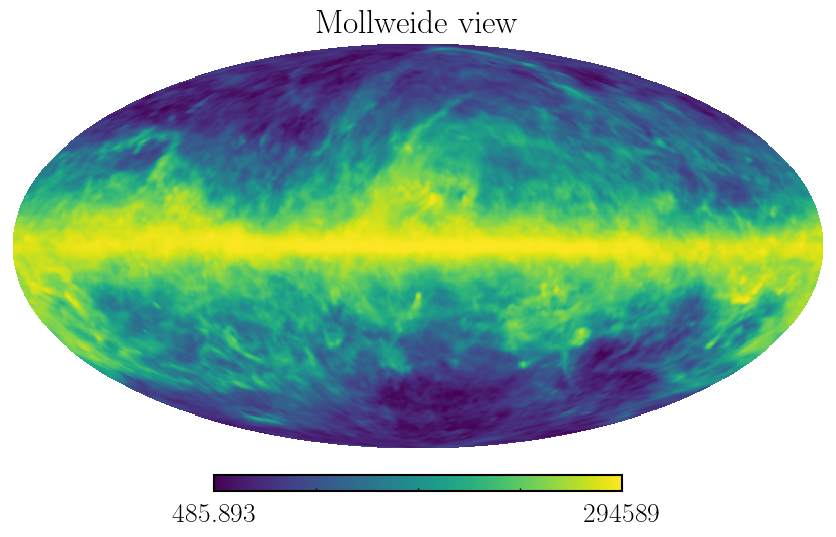

In [10]:
hp.mollview(planck353, norm='hist')

In [11]:
planck_mask = '/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/Planck/HFI_Mask_GalPlane-apo5_2048_R2.00.fits'

In [12]:
print(autils.FSKYS)

['GAL060', 'GAL070', 'GAL080']


In [13]:
# 20, 40, 60, 70, 80, 90, 97, and 99%

In [14]:
hp_masks = {}
w2_hpmasks = {}
for i, fsky in enumerate(autils.FSKYS):
    hp_masks[fsky] =  hp.read_map(planck_mask, field=2+i)
    w2_hpmasks[fsky] = np.mean(hp_masks[fsky]**2)

In [17]:
anafast_cl = {}
for skyfrac in autils.FSKYS:
    anafast_cl[f'planck_{skyfrac}_353'] = hp.anafast(planck353 * hp_masks[skyfrac], lmax=args.mlmax)/ w2_hpmasks[skyfrac]

In [46]:
for skyfrac in autils.FSKYS:
    anafast_cl[f'van_{skyfrac}_90'] = hp.anafast(van90 * hp_masks[skyfrac], lmax=args.mlmax)/ w2_hpmasks[skyfrac]

In [49]:
for skyfrac in autils.FSKYS:
    anafast_cl[f'van_{skyfrac}_150'] = hp.anafast(van150 * hp_masks[skyfrac], lmax=args.mlmax)/ w2_hpmasks[skyfrac]

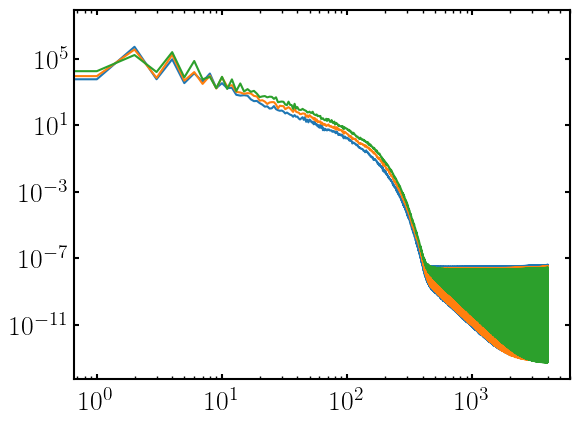

In [18]:
for skyfrac in autils.FSKYS:
    plt.loglog(anafast_cl[f'planck_{skyfrac}_353'] )

In [19]:
sky_hp_maps = {}
args.dust_freq=353
args.nside=2048
for dust_type in ['d9', 'd10', 'd12']:

    print(dust_type)
    sky_dust = pysm3.Sky(nside=args.nside, preset_strings=[dust_type])
    map_freqGHz = sky_dust.get_emission(args.dust_freq * u.GHz)
    sky_hp_maps[f'{dust_type}_353'] = map_freqGHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(args.dust_freq*u.GHz))[0]


d9
d10
d12


In [20]:
#sky_hp_maps = {}
args.dust_freq=90
args.nside=2048
for dust_type in ['d9', 'd10', 'd12']:

    print(dust_type)
    sky_dust = pysm3.Sky(nside=args.nside, preset_strings=[dust_type])
    map_freqGHz = sky_dust.get_emission(args.dust_freq * u.GHz)
    sky_hp_maps[f'{dust_type}_{args.dust_freq}'] = map_freqGHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(args.dust_freq*u.GHz))[0]


d9
d10
d12


In [21]:
#sky_hp_maps = {}
args.dust_freq=150
args.nside=2048
for dust_type in ['d9', 'd10', 'd12']:

    print(dust_type)
    sky_dust = pysm3.Sky(nside=args.nside, preset_strings=[dust_type])
    map_freqGHz = sky_dust.get_emission(args.dust_freq * u.GHz)
    sky_hp_maps[f'{dust_type}_{args.dust_freq}'] = map_freqGHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(args.dust_freq*u.GHz))[0]


d9
d10
d12


In [22]:
for skyfrac in autils.FSKYS:
    for dust_type in ['d9', 'd10', 'd12']:
        anafast_cl[f'{dust_type}_{skyfrac}_353'] = hp.anafast(sky_hp_maps[f'{dust_type}_353'] * hp_masks[skyfrac], lmax=args.mlmax)/ w2_hpmasks[skyfrac]

In [23]:
for skyfrac in autils.FSKYS:
    for dust_type in ['d9', 'd10', 'd12']:
        anafast_cl[f'{dust_type}_{skyfrac}_90'] = hp.anafast(sky_hp_maps[f'{dust_type}_90'] * hp_masks[skyfrac], lmax=args.mlmax)/ w2_hpmasks[skyfrac]

In [24]:
for skyfrac in autils.FSKYS:
    for dust_type in ['d9', 'd10', 'd12']:
        anafast_cl[f'{dust_type}_{skyfrac}_150'] = hp.anafast(sky_hp_maps[f'{dust_type}_150'] * hp_masks[skyfrac], lmax=args.mlmax)/ w2_hpmasks[skyfrac]

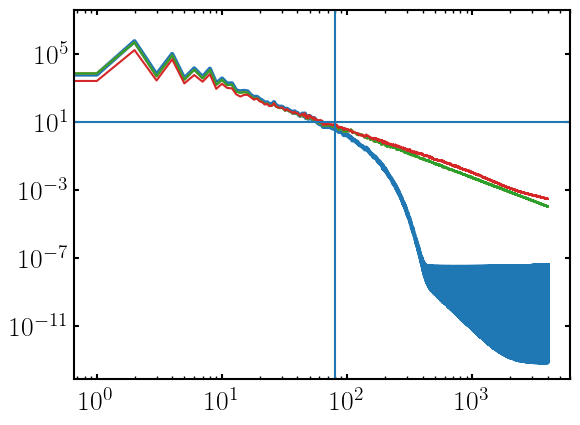

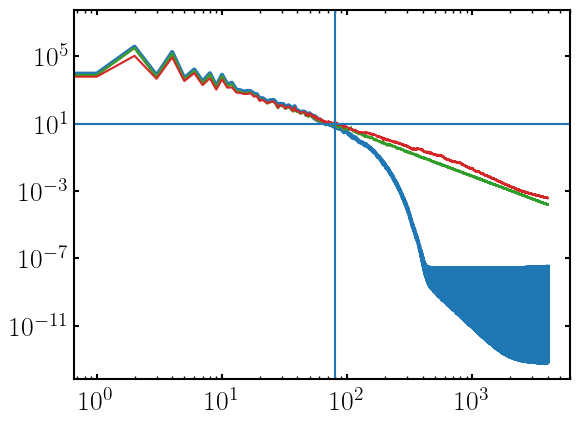

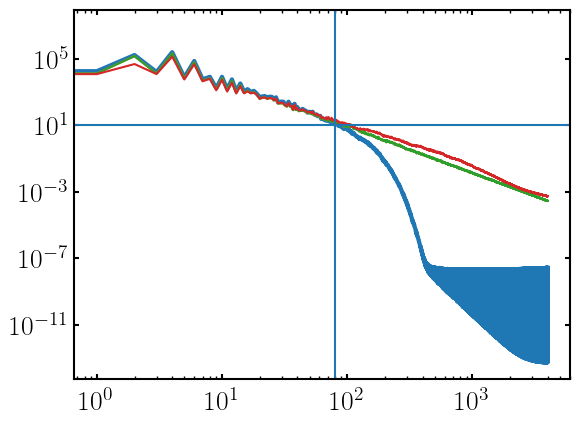

In [25]:
for skyfrac in autils.FSKYS:
    
    plt.loglog(anafast_cl[f'planck_{skyfrac}_353'], lw=3 )
    for dust_type in ['d9', 'd10', 'd12']:
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_353'] )
    plt.axvline(80)
    plt.axhline(10)
    #plt.xlim(10,500)
    #plt.ylim(1e0, 1e4)
    plt.show()

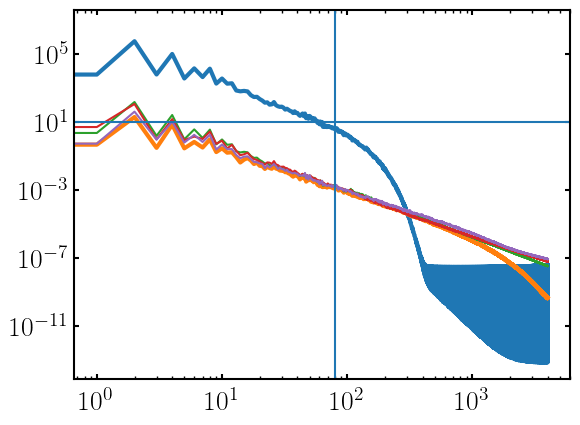

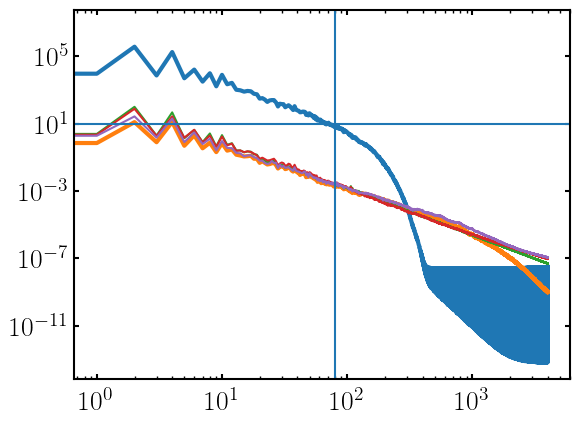

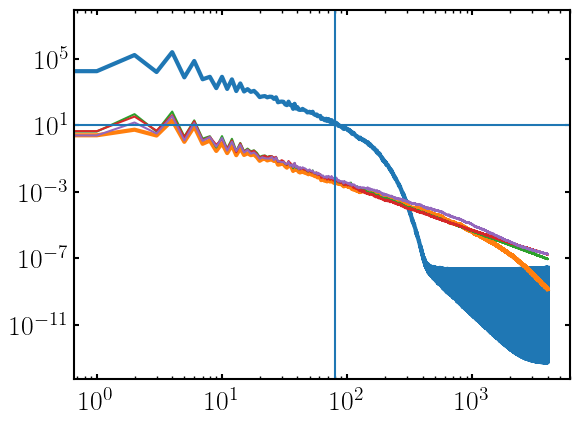

In [47]:
for skyfrac in autils.FSKYS:
    
    plt.loglog(anafast_cl[f'planck_{skyfrac}_353'], lw=3 )
    plt.loglog(anafast_cl[f'van_{skyfrac}_90'], lw=3 )
    for dust_type in ['d9', 'd10', 'd12']:
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_90'] )
    plt.axvline(80)
    plt.axhline(10)
    #plt.xlim(10,500)
    #plt.ylim(1e0, 1e4)
    plt.show()

In [132]:
from scipy.constants import physical_constants
h_JHz = physical_constants['Planck constant'][0]
k_JK  = physical_constants['Boltzmann constant'][0]
T_CMB =  2.72548

def fcmb(nu):

    '''
    spectral energy density in CMB units

    ** parameters **
    nu: float
        frequency in GHz
    '''

    x = h_JHz * 1e9/(k_JK*T_CMB) *nu
    return np.exp(x)*(x/(np.expm1(x)))**2

#All spectra
def comp_sed_new(nu,nu0,beta,temp,typ):

    '''
    SED for CMB and dust components
    '''

    if typ == 'cmb':
        return fcmb(nu)
    if typ == 'dust':
        x_to=0.04799244662211351*nu/temp
        x_from=0.04799244662211351*nu0/temp
        return (nu/nu0)**(1+beta)*np.expm1(x_from)/np.expm1(x_to) *(fcmb(nu0) / fcmb(nu))
    elif typ == 'sync':
        return (nu/nu0)**beta*fcmb(nu0)
    return None

def comp_sed_old(nu,nu0,beta,temp,typ):

    '''
    SED for CMB and dust components
    '''

    if typ == 'cmb':
        return fcmb(nu)
    if typ == 'dust':
        x_to=0.04799244662211351*nu/temp
        x_from=0.04799244662211351*nu0/temp
        return (nu/nu0)**(1+beta)*np.expm1(x_from)/np.expm1(x_to) *(fcmb(nu0) ) # / fcmb(nu))
    elif typ == 'sync':
        return (nu/nu0)**beta*fcmb(nu0)
    return None

In [115]:
# H_PLANCK = 6.6260755e-34
# K_BOLTZ = 1.380658e-23
# T_CMB = 2.72548
# def thermo2rj(nu):

#         x = H_PLANCK*nu*1.e9/(K_BOLTZ*T_CMB)
#         return x**2 * np.exp(x) / (np.exp(x) - 1.0)**2
# def sed_dust(nu, beta, Tdust):
#         sed_fact_353 = (353e9)**(beta+1) / (np.exp(H_PLANCK*353e9/(K_BOLTZ*Tdust))-1) / thermo2rj(353.0) ; 
#         sed_fact_nu  = (nu * 1e9)**(beta+1) / (np.exp(H_PLANCK*nu*1e9/(K_BOLTZ*Tdust))-1) / thermo2rj(nu)
#         return sed_fact_nu / sed_fact_353

In [116]:
comp_sed(353, 353, 1.59,19.6,  'dust')

1.0

In [117]:
comp_sed(90, 353, 1.59,19.6,  'dust')

0.015380075428601382

In [118]:
comp_sed(150, 353, 1.59,19.6,  'dust')

0.04533351548738638

In [134]:
comp_sed(150, 353, 1.59,19.6,  'dust')/comp_sed(90, 353, 1.59,19.6,  'dust')

2.947548319761971

In [138]:
factor_353to90_old = comp_sed_old(23, 353, 1.59,19.6,  'dust') / comp_sed_old(353, 353, 1.59,19.6,  'dust')
print(1/factor_353to90_old)

factor_353to90_new = comp_sed_new(23, 353, 1.59,19.6,  'dust') / comp_sed_new(353, 353, 1.59,19.6,  'dust')
print(1/factor_353to90_new)

49.77060645285324
633.6258607807762


In [141]:
factor_353to90_old = comp_sed_old(90, 353, 1.59,19.6,  'dust') / comp_sed_old(353, 353, 1.59,19.6,  'dust')
print(1/factor_353to90_old)

factor_353to90_new = comp_sed_new(90, 353, 1.59,19.6,  'dust') / comp_sed_new(353, 353, 1.59,19.6,  'dust')
print(1/factor_353to90_new)

6.184718324565015
65.01918697618098


In [136]:
factor_353to150_old = comp_sed_old(90, 353, 1.59,19.6,  'dust') / comp_sed_old(150, 353, 1.59,19.6,  'dust')
print(1/factor_353to150_old)

factor_353to150_new = comp_sed_new(90, 353, 1.59,19.6,  'dust') / comp_sed_new(150, 353, 1.59,19.6,  'dust')
print(1/factor_353to150_new)

2.085822025174234
2.947548319761971


In [121]:
factor_150to90 = comp_sed(90, 353, 1.59,19.6,  'dust') / comp_sed(150, 353, 1.59,19.6,  'dust')
print(1/factor_150to90)

2.947548319761971


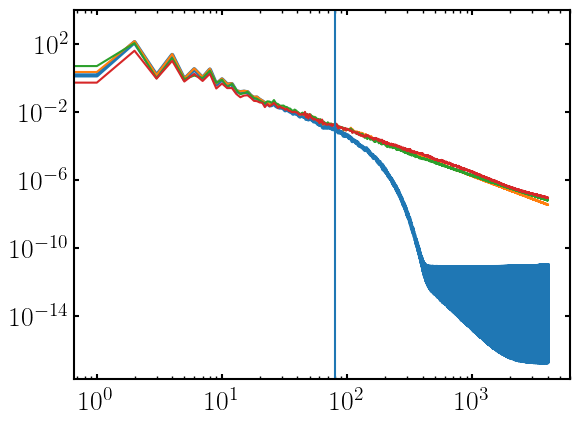

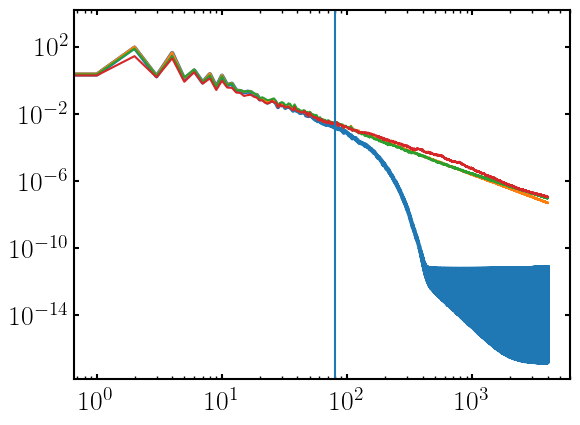

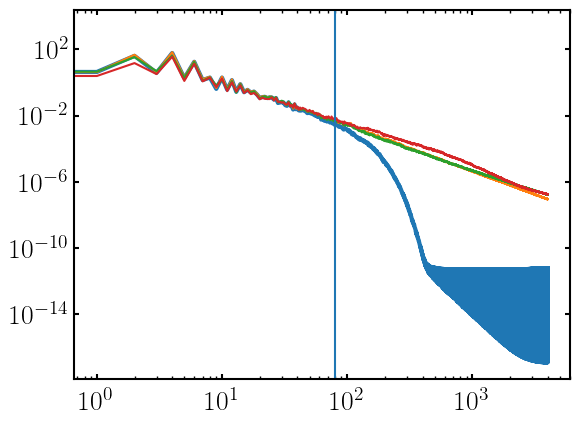

In [143]:
for skyfrac in autils.FSKYS:
    
    plt.loglog(anafast_cl[f'planck_{skyfrac}_353'] * factor_353to90_new**2, lw=3 )
    for dust_type in ['d9', 'd10', 'd12']:
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_90'] )
    plt.axvline(80)
    #plt.xlim(10,500)
    #plt.ylim(1e0, 1e4)
    plt.show()

In [68]:
# anafast_cl = {}
for skyfrac in autils.FSKYS:
    anafast_cl[f'planck_{skyfrac}_90'] = hp.anafast(planck353 * factor_353to90 * hp_masks[skyfrac], lmax=args.mlmax)/ w2_hpmasks[skyfrac]

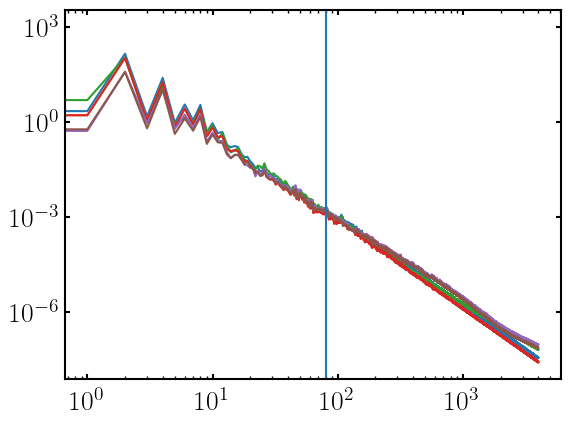

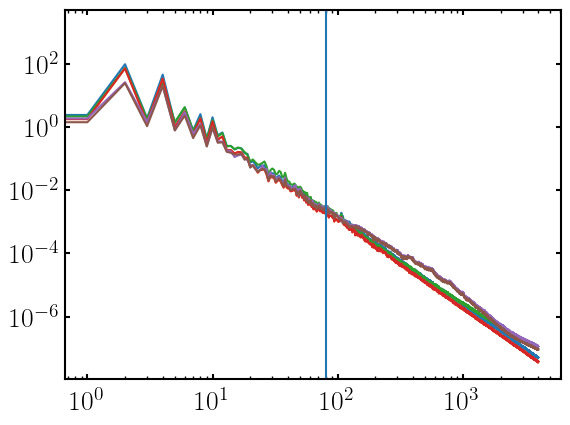

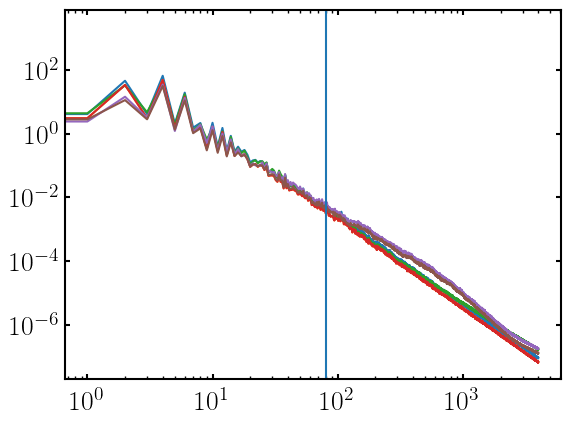

In [123]:
for skyfrac in autils.FSKYS:
    
    #plt.loglog(anafast_cl[f'planck_{skyfrac}_90'] , lw=3 )
    for dust_type in ['d9', 'd10', 'd12']:
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_90'] )
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_353'] * factor_353to90**2 )
    plt.axvline(80)
    #plt.xlim(10,500)
    #plt.ylim(1e0, 1e4)
    plt.show()

In [124]:
dust_type='d9'
skyfrac='GAL060'
1/np.sqrt(np.mean(anafast_cl[f'{dust_type}_{skyfrac}_90'] / anafast_cl[f'{dust_type}_{skyfrac}_150']))

2.7864776142692196

In [125]:
dust_type='van'
skyfrac='GAL060'
1/np.sqrt(np.mean(anafast_cl[f'{dust_type}_{skyfrac}_90'] / anafast_cl[f'{dust_type}_{skyfrac}_150']))

2.958734765346236

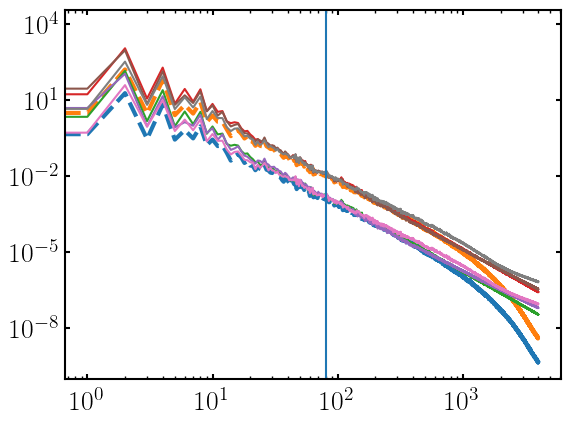

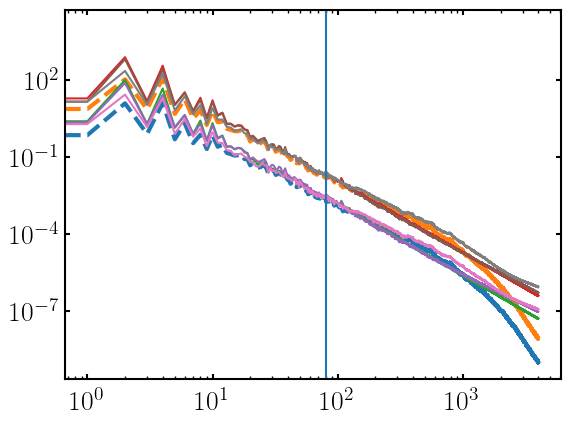

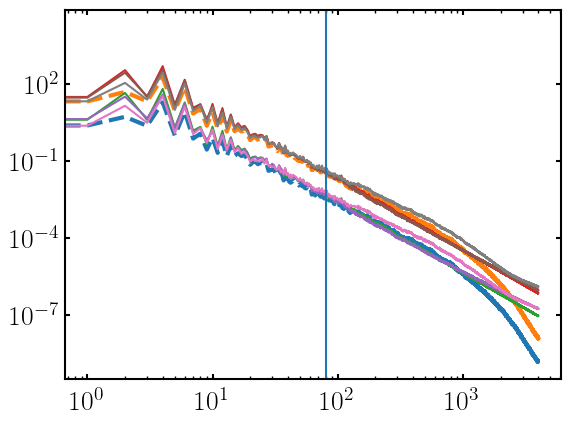

In [126]:
for skyfrac in autils.FSKYS:
    plt.loglog(anafast_cl[f'van_{skyfrac}_90'], lw=3, ls='--' )
    plt.loglog(anafast_cl[f'van_{skyfrac}_150'], lw=3 , ls='--')
    #plt.loglog(anafast_cl[f'planck_{skyfrac}'] * factor_353to90**4, lw=3 )
    for dust_type in ['d9', 'd10', 'd12']:
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_90'] )
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_150'] )
    plt.axvline(80)
    #plt.xlim(10,500)
    #plt.ylim(1e0, 1e4)
    plt.show()

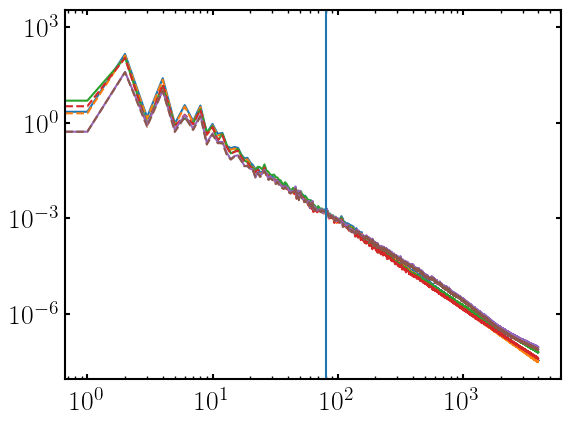

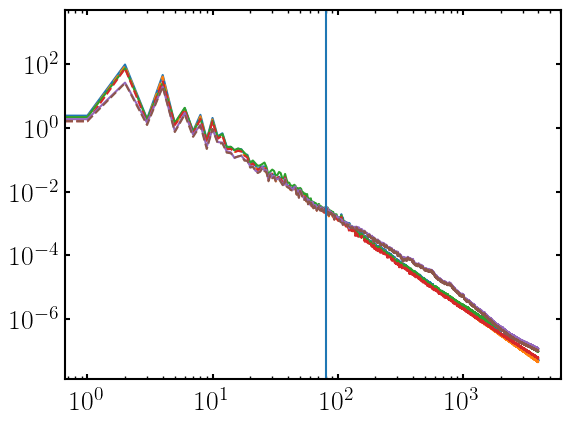

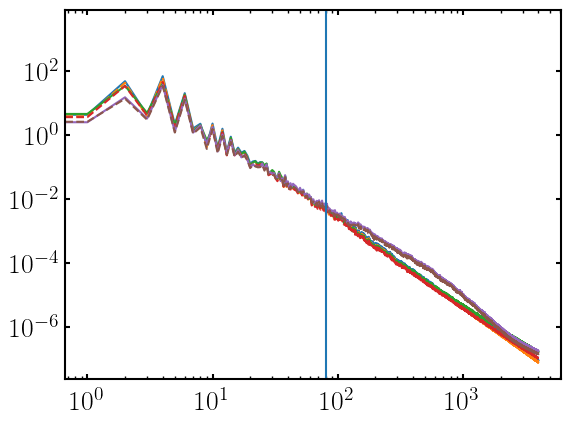

In [127]:
for skyfrac in autils.FSKYS:
    
    #plt.loglog(anafast_cl[f'planck_{skyfrac}'] * factor_353to90**4, lw=3 )
    for dust_type in ['d9', 'd10', 'd12']:
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_90'] )
        plt.loglog(anafast_cl[f'{dust_type}_{skyfrac}_150'] * factor_150to90**2, ls='--') 
    plt.axvline(80)
    #plt.xlim(10,500)
    #plt.ylim(1e0, 1e4)
    plt.show()